In [81]:
 # import all libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import joblib as jb

In [82]:
# load dataset
df = pd.read_csv("ice_cream.csv")
df

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


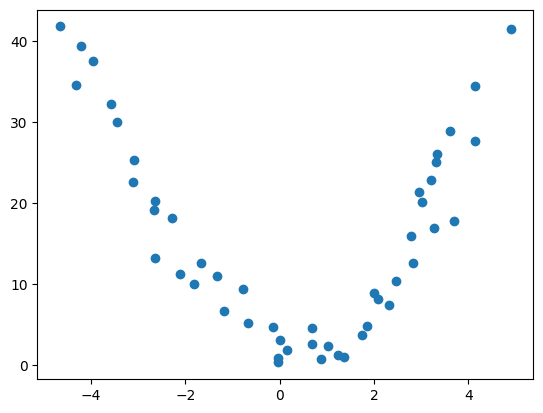

In [84]:
# data visualisation in chart
plt.scatter(df["Temperature (°C)"],df["Ice Cream Sales (units)"])

In [85]:
# x_input and y_output separate
x = df.iloc[:,:1]
y = df.iloc[:,-1]

In [95]:
from sklearn.preprocessing import PolynomialFeatures
pl = PolynomialFeatures(degree=2)
x_poly = pl.fit_transform(x)

In [96]:
x_poly[0]

array([ 1.        , -4.66226268, 21.73669327])

In [97]:
x_poly_train,y_train,x_poly_test,y_test = train_test_split(x_poly,y,test_size = 0.2,random_state = 34)

In [98]:
lr = LinearRegression()

In [99]:
lr.fit(x_poly,y)

LinearRegression()

In [100]:
y_predc = lr.predict(x_poly)

In [101]:
r2_score(y,y_predc)

0.9321137090423876

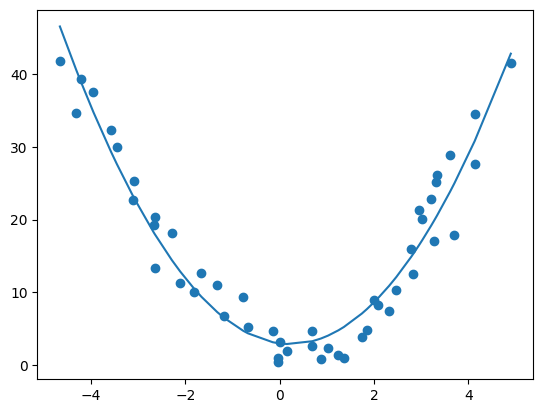

In [102]:
plt.scatter(df["Temperature (°C)"],df["Ice Cream Sales (units)"])
plt.plot(x,y_predc)

In [103]:
jb.dump(lr,"ice_cream_sales.joblib")

['ice_cream_sales.joblib']